In [1]:
using Pkg
Pkg.activate(@__DIR__)
Pkg.status()
Pkg.instantiate()
using Revise, Distributions, GLMakie
using TrypColonies, BenchmarkTools, ImageFiltering

  Activating project at `c:\Users\ank10ki\Dropbox\phd\TrypColonies\TrypColonies`


Project TrypColonies v1.0.0-DEV
Status `C:\Users\ank10ki\Dropbox\phd\TrypColonies\TrypColonies\Project.toml`
⌃ [336ed68f] CSV v0.10.14
⌃ [35d6a980] ColorSchemes v3.26.0
  [a93c6f00] DataFrames v1.7.0
  [864edb3b] DataStructures v0.18.20
  [31c24e10] Distributions v0.25.112
⌃ [e9467ef8] GLMakie v0.10.14
  [6a3955dd] ImageFiltering v0.7.8
  [d96e819e] Parameters v0.12.3
  [37e2e46d] LinearAlgebra v1.11.0
  [9a3f8284] Random v1.11.0
  [9e88b42a] Serialization v1.11.0
  [2f01184e] SparseArrays v1.11.0
Info Packages marked with ⌃ have new versions available and may be upgradable.


In [2]:
para = parameters(size = (40,40))
scal_grid = create_exp_scalar_grid(para);
grad = imgradients(scal_grid,KernelFactors.sobel )
strength = vec(sqrt.(grad[1].^2 .+ grad[2].^2););

In [3]:
grad_x, grad_y = grad   

([1.966942697288929e-6 3.277101579046281e-6 … 3.2771015790462834e-6 1.96694269728893e-6; 5.384444835440589e-6 8.970964277114373e-6 … 8.970964277114368e-6 5.384444835440587e-6; … ; -5.384444835440589e-6 -8.970964277114373e-6 … -8.970964277114368e-6 -5.384444835440587e-6; -1.966942697288929e-6 -3.277101579046281e-6 … -3.2771015790462834e-6 -1.96694269728893e-6], [1.9669426972889225e-6 5.384444835440586e-6 … -5.384444835440586e-6 -1.96694269728893e-6; 3.2771015790462758e-6 8.97096427711437e-6 … -8.97096427711437e-6 -3.2771015790462834e-6; … ; 3.277101579046276e-6 8.970964277114372e-6 … -8.970964277114372e-6 -3.277101579046283e-6; 1.9669426972889216e-6 5.384444835440587e-6 … -5.384444835440587e-6 -1.96694269728893e-6])

In [4]:
Fig = Figure(size = (800, 800))
ax = Axis(Fig[1, 1], xlabel = "x", ylabel = "y")
img = heatmap!(ax,scal_grid, colormap = (:viridis, 0.8))
#heatmap(T)
quiver2 = arrows!(ax, 1:para.size[1], 1:para.size[2], -grad_x, -grad_y, arrowsize =strength*100, lengthscale = maximum(strength)*50)    
display(Fig)
save("gradient.png", Fig)

In [7]:
Lx, Ly   = 10.0, 10.0    # domain extend
λ0       = 3.5           # background heat conductivity
ttot     = 0.5           # total time
# Numerics
n        = 1
nx, ny   = n*64, n*64   # number of grid points
ndt      = 10            # sparse timestep computation
nvis     = 50            # sparse visualisation
# Derived numerics
dx, dy   = Lx/nx, Ly/ny  # grid cell size
xc, yc   = LinRange(dx/2, Lx-dx/2, nx), LinRange(dy/2, Ly-dy/2, ny)
min_dxy2 = min(dx,dy)^2
# Array initialisation
T = Array(exp.(.-(xc .- Lx/2).^2 .-(yc' .- Ly/2).^2))


64×64 Matrix{Float64}:
 9.08991e-22  4.12989e-21  1.78695e-20  …  4.12989e-21  9.08991e-22
 4.12989e-21  1.87637e-20  8.1188e-20      1.87637e-20  4.12989e-21
 1.78695e-20  8.1188e-20   3.5129e-19      8.1188e-20   1.78695e-20
 7.36343e-20  3.34549e-19  1.44755e-18     3.34549e-19  7.36343e-20
 2.88963e-19  1.31287e-18  5.68061e-18     1.31287e-18  2.88963e-19
 1.07994e-18  4.90657e-18  2.12301e-17  …  4.90657e-18  1.07994e-18
 3.84369e-18  1.74634e-17  7.55617e-17     1.74634e-17  3.84369e-18
 1.30285e-17  5.91933e-17  2.56122e-16     5.91933e-17  1.30285e-17
 4.20564e-17  1.91078e-16  8.26771e-16     1.91078e-16  4.20564e-17
 1.2929e-16   5.87415e-16  2.54166e-15     5.87415e-16  1.2929e-16
 ⋮                                      ⋱               
 4.20564e-17  1.91078e-16  8.26771e-16  …  1.91078e-16  4.20564e-17
 1.30285e-17  5.91933e-17  2.56122e-16     5.91933e-17  1.30285e-17
 3.84369e-18  1.74634e-17  7.55617e-17     1.74634e-17  3.84369e-18
 1.07994e-18  4.90657e-18  2.12301e-1

In [9]:
fig = heatmap(diff(T, dims=1), colormap = (:balance, 0.3))    
heatmap!(diff(T, dims=2), colormap = (:balance, 0.3))
fig

In [10]:
@benchmark begin 
    t_x = -diff(T, dims=1)[:,2:end];
    t_y = -diff(T, dims=2)[2:end,:];
end

BenchmarkTools.Trial: 10000 samples with 1 evaluation.
 Range (min … max):  11.600 μs …  11.574 ms  ┊ GC (min … max):  0.00% … 99.18%
 Time  (median):     31.300 μs               ┊ GC (median):     0.00%
 Time  (mean ± σ):   66.356 μs ± 296.069 μs  ┊ GC (mean ± σ):  20.51% ±  4.81%

    ▄█▆▇▄▂▁      ▂▄▅▅▆▆▅▃▂▁▁ ▁▁▁                               ▂
  ▆▆███████▇▆▆▅▅█████████████████▇▆▇▆▆▅▆▅▅▆▃▄▅▅▂▄▂▃▅▅▄▂▅▄▆▅▇▇▇ █
  11.6 μs       Histogram: log(frequency) by time       206 μs <

 Memory estimate: 187.78 KiB, allocs estimate: 20.

In [ ]:
size(t_x), size(t_y)



((127, 127), (127, 127))

In [ ]:
strength = vec(sqrt.(t_x .^ 2 .+ t_y .^ 2))
strength = strength *10

16129-element Vector{Float64}:
 1.4836974853136224e-20
 3.1458021011595324e-20
 6.588521488042127e-20
 1.3630601341843835e-19
 2.78556003590805e-19
 5.623160685986781e-19
 1.1212926287903024e-18
 2.208655677113508e-18
 4.297419512887376e-18
 8.259586889801217e-18
 1.56812232402949e-17
 2.940849711781231e-17
 5.448002584797313e-17
 ⋮
 1.476989815079441e-17
 7.809269914437724e-18
 4.07961822860447e-18
 2.1057324259843458e-18
 1.0738899725720545e-18
 5.41112617127948e-19
 2.693922512426989e-19
 1.3251052327272066e-19
 6.439938317593482e-20
 3.092269477724329e-20
 1.4670180215545685e-20
 6.87629092848639e-21

In [ ]:
fig = Figure(size = (1000, 1000))
ax = Axis(fig[1, 1])
heatmap!(ax, T[2:end-1, 2:end-1], colormap = (:balance, 0.5))
arrows!(ax, 1:size(t_x)[1], 1:size(t_x,)[1], t_x, t_y,arrowsize =strength*10, lengthscale = maximum(strength*10))
display(fig)

GLMakie.Screen(...)

In [2]:
# julia --project -O3 --check-bounds=no diffusion_2D_expl_xpu.jl
const USE_GPU = false  # Use GPU? If this is set false, then no GPU needs to be available
using ParallelStencil
using ParallelStencil.FiniteDifferences2D
@static if USE_GPU
    @init_parallel_stencil(CUDA, Float64, 2)
else
    @init_parallel_stencil(Threads, Float64, 2)
end
using Printf
using GLMakie

@parallel function compute_flux!(qTx, qTy, T, Lam, dx, dy)
    @all(qTx) = -@av_xi(Lam)*@d_xi(T)/dx
    @all(qTy) = -@av_yi(Lam)*@d_yi(T)/dy
    return
end

@parallel function compute_update!(T, qTx, qTy, ρCp, dt, dx, dy, decay_rate)
    @inn(T) = @inn(T) - dt/@inn(ρCp)*(@d_xa(qTx)/dx + @d_ya(qTy)/dy) - dt*decay_rate*@inn(T)
    return
end

compute_update! (generic function with 1 method)

In [3]:
Lx, Ly   = 10.0, 10.0    # domain extend
λ0       = 13.5           # background heat conductivity
ttot     = 0.5           # total time
# Numerics
n        = 2
nx, ny   = n*64, n*64    # number of grid points
ndt      = 10            # sparse timestep computation
nvis     = 50            # sparse visualisation
# Derived numerics
dx, dy   = Lx/nx, Ly/ny  # grid cell size
xc, yc   = LinRange(dx/2, Lx-dx/2, nx), LinRange(dy/2, Ly-dy/2, ny)
min_dxy2 = min(dx,dy)^2
# Array initialisation
T        = Data.Array(exp.(.-(xc .- Lx/2).^2 .-(yc' .- Ly/2).^2))
qTx      = @zeros(nx-1,ny-2)
qTy      = @zeros(nx-2,ny-1)
ρCp      =   ones(nx  ,ny  )
ρCp[((xc.-Lx/3).^2 .+ (yc'.-Ly/3).^2).<1.0].=0.01
ρCp      = Data.Array(ρCp)
Lam      = λ0 .+ 0.1.*@rand(nx,ny)
dt       = min_dxy2/maximum(Lam./ρCp)/4.1
decay_rate = 0.1

0.1

In [11]:
@views function diffusion_2D(; do_visu=false)
    n_t = 1
    results = Vector{Tuple{Array{Float64,2},Array{Float64,2},Array{Float64,2}}}(undef, n_t)
    Threads.@threads for i in 1:n_t 

        # Physics
        Lx, Ly   = 10.0, 10.0    # domain extend
        λ0       = .5           # background heat conductivity
        ttot     = 0.5           # total time
        # Numerics
        n        = 2
        nx, ny   = n*64, n*64    # number of grid points
        ndt      = 10            # sparse timestep computation
        nvis     = 50            # sparse visualisation
        # Derived numerics
        dx, dy   = Lx/nx, Ly/ny  # grid cell size
        xc, yc   = LinRange(dx/2, Lx-dx/2, nx), LinRange(dy/2, Ly-dy/2, ny)
        min_dxy2 = min(dx,dy)^2
        # Array initialisation
        T        = Data.Array(exp.(.-(xc .- Lx/2).^2 .-(yc' .- Ly/2).^2))
        qTx      = @zeros(nx-1,ny-2)
        qTy      = @zeros(nx-2,ny-1)
        ρCp      =   ones(nx  ,ny  )
        ρCp[((xc.-Lx/3).^2 .+ (yc'.-Ly/3).^2).<1.0].=0.01
        ρCp      = Data.Array(ρCp)
        Lam      = λ0 .+ 0.1.*zeros(nx,ny)
        dt       = min_dxy2/maximum(Lam./ρCp)/4.1
        decay_rate = 10
        #dt = 0.000001
        time=0.0; it=0; t_tic=0.0; niter=0

        pos = rand([1:nx;], 2)
        # Time loop
        if do_visu
            time2 = Observable(0.0)
            fig = Figure()
            #heatmap(t[2:end-1,2:end-1])
        
            ax = Axis(fig[1, 1], title =  @lift("Timestep = $(round($(time2), sigdigits = 4))"))   #@lift("Timestep = $(round($(fig_obs.Time), digits = 1))")
            hm = heatmap!(ax, xc[2:end-1], yc[2:end-1], Array(T)[2:end-1, 2:end-1],colorrange = (0.0, 1.0))

            strength = vec(sqrt.(qTx[2:end,:] .^ 2 .+ qTy[:,2:end].^ 2))
            #arrow = arrows!(ax, xc[2:end-1], yc[2:end-1], qTx[2:end,:], qTy[:,2:end])#,arrowsize =strength*10, lengthscale = maximum(strength))
            color = Colorbar(fig[:, 2], hm)
            display(fig)
        end
    

        while time < ttot
            it += 1
            if (it == 11) t_tic = Base.time(); niter = 0 end
            if (it % ndt == 0) dt = min_dxy2/maximum(Lam./ρCp)/4.1 end # done every ndt to improve perf
            @parallel compute_flux!(qTx, qTy, T, Lam, dx, dy)
            @parallel compute_update!(T, qTx, qTy, ρCp, dt, dx, dy, decay_rate)
            
            T[pos[1], pos[2]] += 0.5
            pos += rand([-1, 0, 1], 2)
            
            if pos[1] < 1 pos[1] = nx end
            if pos[1] > nx pos[1] = 1 end
            if pos[2] < 1 pos[2] = ny end
            if pos[2] > ny pos[2] = 1 end
            
            niter += 1
            time += dt
            
            if do_visu && (it % nvis == 0)
    
                delete!(ax, hm)
                #delete!(ax, arrow)
                delete!(color)
                time2[] = time
                hm = heatmap!(ax, xc[2:end-1], yc[2:end-1], Array(T)[2:end-1, 2:end-1],colorrange = (0.0, 1.0))
                strength = vec(sqrt.(qTx[2:end,:] .^ 2 .+ qTy[:,2:end].^ 2))
                #arrow = arrows!(ax, xc[2:end-1], yc[2:end-1], qTx[2:end,:], qTy[:,2:end],arrowsize =strength*10) #, lengthscale = maximum(strength))

                color =Colorbar(fig[:, 2], hm)
                display(fig)
                sleep(0.000001)
                isopen(fig.scene) || break 
            end
        end
        t_toc = Base.time() - t_tic
        @printf("Computed %d steps, physical time = %1.3f\n", it, time)
        A_eff = 4/1e9*nx*ny*sizeof(Float64)  # Effective main memory access per iteration [GB]
        t_it  = t_toc/niter                  # Execution time per iteration [s]
        T_eff = A_eff/t_it                   # Effective memory throughput [GB/s]
        @printf("Perf: time = %1.3f sec, T_eff = %1.2f GB/s\n", t_toc, round(T_eff, sigdigits=3))
        results[i] = (Array(T)', qTx, qTy)

    end
    return results
end


diffusion_2D (generic function with 1 method)

In [19]:
res = diffusion_2D(do_visu=false)

Computed 16794 steps, physical time = 0.500
Perf: time = 2.190 sec, T_eff = 4.02 GB/s


1-element Vector{Tuple{Matrix{Float64}, Matrix{Float64}, Matrix{Float64}}}:
 ([4.1999402040478317e-22 9.062212148992098e-22 … 9.062212148992098e-22 4.1999402040478317e-22; 9.062212148992098e-22 0.011404622194089255 … 0.05133486667849518 9.062212148992098e-22; … ; 9.062212148992098e-22 1.4160211559286762e-5 … 0.033982391490472434 9.062212148992098e-22; 4.1999402040478317e-22 9.062212148992098e-22 … 9.062212148992098e-22 4.1999402040478317e-22], [-0.07298826165943742 -0.19906797540498058 … -0.00017319064875442208 -9.062161496905005e-5; -0.029347866403794276 -0.04884548603873773 … -0.00021200864125258236 -0.00011126939926919244; … ; 0.32865265381344855 0.31634389996642226 … 0.44111292202192215 0.3703455629702141; 0.32855238536359116 0.69332315993023 … 0.3089965443707714 0.21748649092769226], [-0.07298826165943742 -0.12607971374554316 … 8.256903378537204e-5 9.062161496905005e-5; -0.1023361280632317 -0.14557733338048662 … 0.00018330827576876194 0.0002018910142382425; … ; -0.6572050391770398

In [1]:
USE_GPU = false
using BenchmarkTools
using ParallelStencil
using ParallelStencil.FiniteDifferences2D
@static if USE_GPU
    @init_parallel_stencil(CUDA, Float64, 2);
else
    @init_parallel_stencil(Threads, Float64, 2);
end

@parallel_indices (ix,iy) function diffusion2D_step!(T2, T, Ci, lam, dt, _dx, _dy)
    tx  = @threadIdx().x + 1
    ty  = @threadIdx().y + 1
    T_l = @sharedMem(eltype(T), (@blockDim().x+2, @blockDim().y+2))
    T_l[tx,ty] = T[ix,iy]
    if (ix>1 && ix<size(T2,1) && iy>1 && iy<size(T2,2))
        if (@threadIdx().x == 1)             T_l[tx-1,ty] = T[ix-1,iy] end
        if (@threadIdx().x == @blockDim().x) T_l[tx+1,ty] = T[ix+1,iy] end
        if (@threadIdx().y == 1)             T_l[tx,ty-1] = T[ix,iy-1] end
        if (@threadIdx().y == @blockDim().y) T_l[tx,ty+1] = T[ix,iy+1] end
        @sync_threads()
        T2[ix,iy] = T_l[tx,ty] + dt*(Ci[ix,iy]*(
                    - ((-lam*(T_l[tx+1,ty] - T_l[tx,ty])*_dx) - (-lam*(T_l[tx,ty] - T_l[tx-1,ty])*_dx))*_dx
                    - ((-lam*(T_l[tx,ty+1] - T_l[tx,ty])*_dy) - (-lam*(T_l[tx,ty] - T_l[tx,ty-1])*_dy))*_dy
                    ));
    end
    return
end

function diffusion2D()
# Physics
lam      = 1.0;                                          # Thermal conductivity
c0       = 2.0;                                          # Heat capacity
lx, ly   = 1.0, 1.0;                                     # Length of computational domain in dimension x and y

# Numerics
nx, ny   = 512*32, 512*32;                               # Number of gridpoints in dimensions x and y
nt       = 100;                                          # Number of time steps
dx       = lx/(nx-1);                                    # Space step in x-dimension
dy       = ly/(ny-1);                                    # Space step in y-dimension
_dx, _dy = 1.0/dx, 1.0/dy;

# Array initializations
T   = @zeros(nx, ny);
T2  = @zeros(nx, ny);
Ci  = @zeros(nx, ny);

# Initial conditions
Ci .= 1/c0;                                              # 1/Heat capacity
T  .= 1.7;
T2 .= T;                                                 # Assign also T2 to get correct boundary conditions.
#
# GPU launch parameters
threads = (32, 8)
blocks  = (nx, ny) .÷ threads
#
# Time loop
dt   = min(dx^2,dy^2)/lam/maximum(Ci)/4.1;               # Time step for 2D Heat diffusion
for it = 1:nt
    if (it == 11) GC.enable(false); global t_tic=time(); end      # Start measuring time.
    @parallel blocks threads shmem=prod(threads.+2)*sizeof(Float64) diffusion2D_step!(T2, T, Ci, lam, dt, _dx, _dy);
    T, T2 = T2, T;
end
time_s = time() - t_tic

# Performance
A_eff = (2*1+1)*1/1e9*nx*ny*sizeof(eltype(T));           # Effective main memory access per iteration [GB] (Lower bound of required memory access: T has to be read and written: 2 whole-array memaccess; Ci has to be read: : 1 whole-array memaccess)
t_it  = time_s/(nt-10);                                  # Execution time per iteration [s]
T_eff = A_eff/t_it;                                      # Effective memory throughput [GB/s]
println("time_s=$time_s t_it=$t_it T_eff=$T_eff");

# Performance
A_eff = (2*1+1)*1/1e9*nx*ny*sizeof(eltype(T));           # Effective main memory access per iteration [GB] (Lower bound of required memory access: T has to be read and written: 2 whole-array memaccess; Ci has to be read: : 1 whole-array memaccess)
t_it = @belapsed begin @parallel $blocks $threads shmem=prod($threads.+2)*sizeof(Float64) diffusion2D_step!($T2, $T, $Ci, $lam, $dt, $_dx, $_dy); end
println("Benchmarktools (min): t_it=$t_it T_eff=$(A_eff/t_it)");

end

diffusion2D()

time_s=63.92199993133545 t_it=0.710244443681505 T_eff=9.070751628278826
Benchmarktools (min): t_it=0.7042178 T_eff=9.148378447690472


In [2]:
diffusion2D()

time_s=63.60900020599365 t_it=0.706766668955485 T_eff=9.115385921525073
Benchmarktools (min): t_it=0.6954267 T_eff=9.264025876487056


In [ ]:
t[2:end-1,2:end-1]

62×62 Matrix{Float64}:
 8.06478e-5   0.000161991  0.000245186  …  9.33194e-5   4.62665e-5
 0.000162086  0.00032577   0.000491981     0.000187993  9.32418e-5
 0.000245335  0.000493023  0.000745385     0.000286491  0.000141558
 0.000331142  0.000665139  0.00100521      0.000388891  0.000192174
 0.000419668  0.000842206  0.00127333      0.00049794   0.000246674
 0.000510574  0.00102689   0.00155162   …  0.000613959  0.000304389
 0.000605913  0.00122002   0.00184328      0.000737885  0.000365964
 0.000707881  0.00142106   0.00214616      0.000871855  0.000432594
 0.000810512  0.00162912   0.00246079      0.00101504   0.000502741
 0.000916681  0.00184203   0.00278706      0.00117118   0.000578667
 0.00102768   0.00206447   0.00312409   …  0.00133914   0.000663451
 0.00114175   0.00229745   0.00347874      0.00151643   0.000751235
 0.00126015   0.00253909   0.00384743      0.00170369   0.000844493
 ⋮                                      ⋱  ⋮            
 0.00077029   0.00155324   0.00236732 

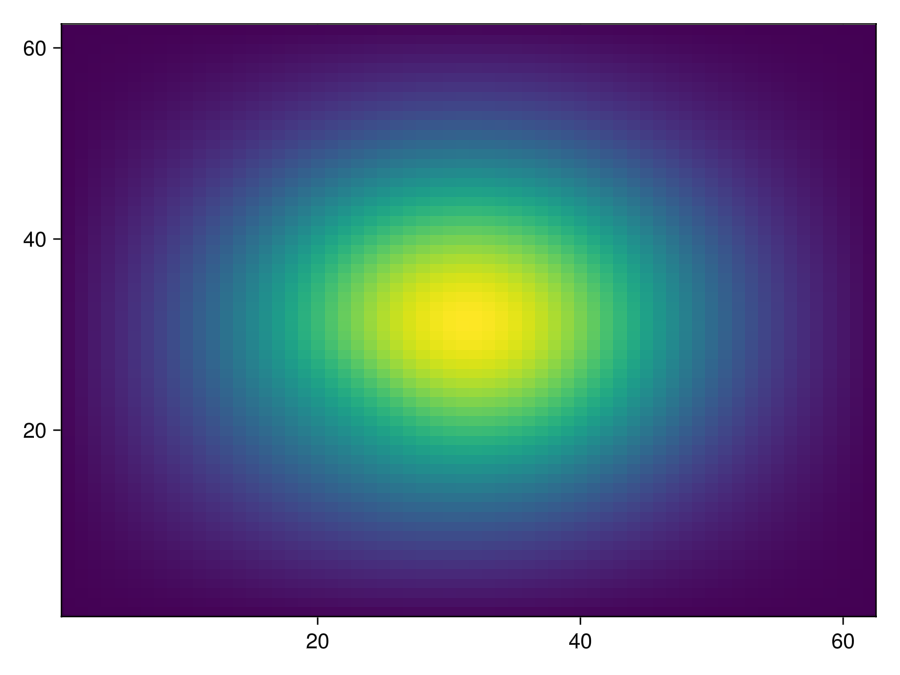

In [ ]:
fig, ax, hm = heatmap(t[2:end-1,2:end-1])

In [15]:
t_x = qtx[2:end,:];
t_y = qty[:,2:end];

In [16]:
t_y = qty[:,2:end];


In [17]:
strength = vec(sqrt.(t_x .^ 2 .+ t_y .^ 2))

3844-element Vector{Float64}:
 0.0026334579799872394
 0.0041902684510900885
 0.0059534732554261185
 0.007846833130102841
 0.00976161847042025
 0.011869900551952634
 0.01404926236325673
 0.016307048097543016
 0.01874012777411141
 0.021062961921716732
 0.023814692451365558
 0.02645079699199028
 0.02914149293598208
 ⋮
 0.016948137318819313
 0.014992186013921908
 0.013104768678681733
 0.011372610859268249
 0.00974726640179283
 0.00823535404527049
 0.006941305567766136
 0.005588322135634845
 0.0043777978871253585
 0.0033234832826415676
 0.0023184413294552514
 0.0014510744781365127

In [18]:
maximum(strength)

0.14493596759921337

In [13]:
62^2

3844

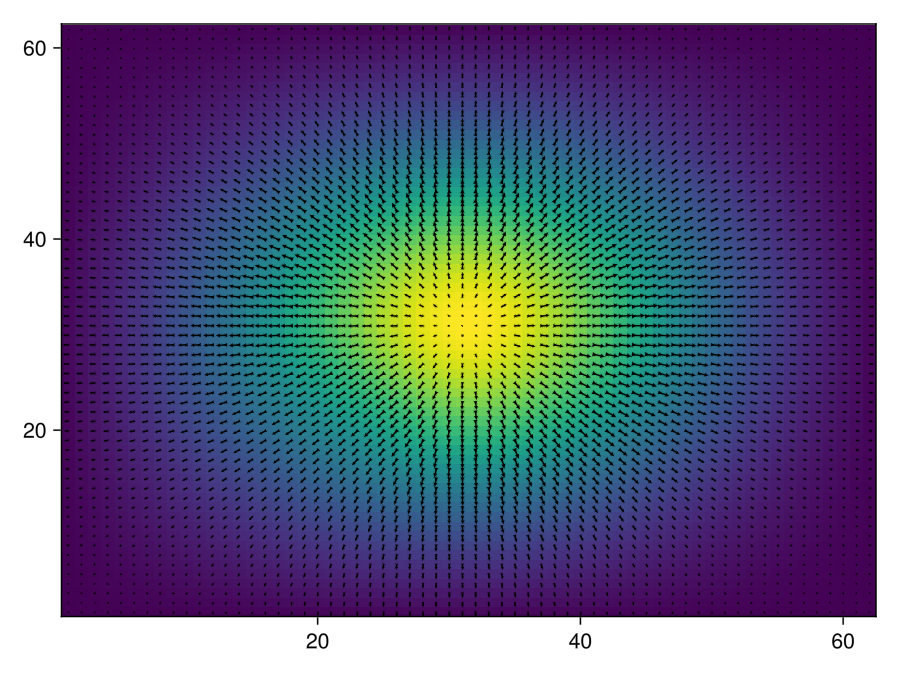

In [21]:
arrows!(ax, 1:62, 1:62,t_x, t_y, arrowsize =strength*30, lengthscale = maximum(strength) )
fig

In [4]:
# julia --project -O3 --check-bounds=no diffusion_2D_impl_xpu.jl
#const USE_GPU = false  # Use GPU? If this is set false, then no GPU needs to be available
using ParallelStencil
using ParallelStencil.FiniteDifferences2D
@static if USE_GPU
    @init_parallel_stencil(CUDA, Float64, 2)
else
    @init_parallel_stencil(Threads, Float64, 2)
end
using GLMakie, Printf, LinearAlgebra

@parallel function compute_flux!(qTx, qTy, T, Lam, dx, dy)
    @all(qTx) = -@av_xi(Lam)*@d_xi(T)/dx
    @all(qTy) = -@av_yi(Lam)*@d_yi(T)/dy
    return
end

macro dtau() esc(:( 1.0/(1.0/(min_dxy2/(@inn(Lam)/@inn(ρCp))/4.1) + 1.0/dt) )) end
@parallel function compute_update!(T, dTdt, Told, qTx, qTy, Lam, ρCp, dt, min_dxy2, dmp, dx, dy)
    @inn(dTdt) = dmp*@inn(dTdt) + ( -(@inn(T) - @inn(Told))/dt - 1.0/@inn(ρCp)*(@d_xa(qTx)/dx + @d_ya(qTy)/dy) )
    @inn(T)    = @inn(T) + @dtau()*@inn(dTdt)
    return
end

@parallel function compute_residual!(ResT, T, Told, qTx, qTy, ρCp, dt, dx, dy)
    @all(ResT) = -(@inn(T) - @inn(Told))/dt - 1.0/@inn(ρCp)*(@d_xa(qTx)/dx + @d_ya(qTy)/dy)
    return
end



┌ Warning: ParallelStencil has already been initialized for the module Main, with the same arguments. You are likely using ParallelStencil in an inconsistent way: @init_parallel_stencil should only be called once at the beginning of each module, right after 'using ParallelStencil'. Note: this warning is only shown in non-interactive mode.
└ @ ParallelStencil C:\Users\Andreas\.julia\packages\ParallelStencil\p8kO2\src\init_parallel_stencil.jl:99
┌ Warning: Module Data from previous module initialization found in caller module (Main); module Data not created. Note: this warning is only shown in non-interactive mode.
└ @ ParallelStencil.ParallelKernel C:\Users\Andreas\.julia\packages\ParallelStencil\p8kO2\src\ParallelKernel\init_parallel_kernel.jl:62


compute_residual! (generic function with 1 method)

In [5]:
@views function diffusion_2D_im(; do_visu=false)
    # Physics
    Lx, Ly   = 20.0, 20.0    # domain extend
    λ0       = 0.5           # background heat conductivity
    ttot     = 2.5           # total time
    # Derived physics
    dt       = ttot/2       # time step, if explicit: min_dxy2/maximum(Lam./ρCp)/4.1
    # Numerics
    n        = 2
    nx, ny   = n*32, n*32    # number of grid points
    nout     = 50            # sparse check
    dmp      = 0.8           # solver acceleration
    iterMax  = 1e4           # max allowed iters
    tol      = 1e-8          # nonlinear tolerance
    # Derived numerics
    dx, dy   = Lx/nx, Ly/ny  # grid cell size
    xc, yc   = LinRange(dx/2, Lx-dx/2, nx), LinRange(dy/2, Ly-dy/2, ny)
    min_dxy2 = min(dx,dy)^2
    # Array initialisation
    T        = Data.Array(exp.(.-(xc .- Lx/2).^2 .-(yc' .- Ly/2).^2))
    Told     = copy(T)
    qTx      = @zeros(nx-1,ny-2)
    qTy      = @zeros(nx-2,ny-1)
    dTdt     = @zeros(nx  ,ny  )
    ResT     = @zeros(nx-2,ny-2)
    ρCp      =   ones(nx  ,ny  )
    ρCp[((xc.-Lx/3).^2 .+ (yc'.-Ly/3).^2).<1.0].=0.01
    ρCp      = Data.Array(ρCp)
    Lam      = λ0 .+ 0.1.*@rand(nx,ny)
    time=0.0; it=0; t_tic=0.0; niter=0; nitertot=0

    time2 = Observable(0.0)
    fig = Figure()

    ax = Axis(fig[1, 1], title =  @lift("Timestep = $(round($(time2), digits = 6))"))   #@lift("Timestep = $(round($(fig_obs.Time), digits = 1))")
    hm = heatmap!(ax, xc, yc, Array(T)', colormap = :davos)
    color = Colorbar(fig[:, 2], hm)
    display(fig)
    # Time loop
    while time < ttot
        it += 1
        err = 2*tol; iter = 0
        while err>tol && iter<iterMax
            iter += 1
            if (it == 1 && iter == 11) t_tic = Base.time(); niter = 0 end
            @parallel compute_flux!(qTx, qTy, T, Lam, dx, dy)
            @parallel compute_update!(T, dTdt, Told, qTx, qTy, Lam, ρCp, dt, min_dxy2, dmp, dx, dy)
            nitertot += 1; niter += 1
            if (iter % nout == 0)
                @parallel compute_residual!(ResT, T, Told, qTx, qTy, ρCp, dt, dx, dy)
                err = norm(ResT)/length(ResT)
            end
            if do_visu
                #display(heatmap(xc, yc, Array(T)'; opts...))
                delete!(ax, hm)
                delete!(color)
                time2[] += dt
                hm = heatmap!(ax, xc, yc, Array(T)', colormap = :thermal, colorrange = (0.0, 1.0))
                color =Colorbar(fig[:, 2], hm)
                display(fig)
                sleep(0.01)
            end
        end
        time += dt
        
    end
    t_toc = Base.time() - t_tic
    @printf("Computed %d steps (total iterations = %d), physical time = %1.3f\n", it, nitertot, time)
    A_eff = 4/1e9*nx*ny*sizeof(Float64)  # Effective main memory access per iteration [GB]
    t_it  = t_toc/niter                  # Execution time per iteration [s]
    T_eff = A_eff/t_it                   # Effective memory throughput [GB/s]
    @printf("Perf: time = %1.3f sec, T_eff = %1.2f GB/s\n", t_toc, round(T_eff, sigdigits=3))
    return
end

diffusion_2D_im(; do_visu=true)

Computed 2 steps (total iterations = 200), physical time = 2.500
Perf: time = 9.375 sec, T_eff = 0.00 GB/s
